<a href="https://colab.research.google.com/github/taba4ek555/dz/blob/main/2%2C_3%2C_4_%D0%94%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Сбор данных

In [13]:
!pip install requests beautifulsoup4
!pip install nltk matplotlib

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

In [3]:
!pip install fake_useragent

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 14.3 MB/s eta 0:00:00


In [4]:
def fetch_habr_articles(max_articles=1000):
    articles = []  # Список для хранения статей
    page_number = 1

    while len(articles) < max_articles:
        url = f'https://habr.com/ru/all/page{page_number}/'
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }

        response = requests.get(url, headers=headers)

        if response.status_code != 200:
            print(f"Ошибка доступа к странице {page_number}: {response.status_code}")
            break  # Выход из цикла при ошибке доступа

        soup = BeautifulSoup(response.text, 'html.parser')

        # Находим все статьи на странице
        articles_on_page = soup.find_all('article')

        if not articles_on_page:
            print(f"На странице {page_number} не найдено статей.")
            break  # Если на странице нет статей, выходим из цикла

        for article in articles_on_page:
            title_tag = article.find('h2')  # Заголовок статьи
            title = title_tag.get_text(strip=True) if title_tag else ' '

            text_tag = article.find('div', class_='article-formatted-body')  # Текст статьи
            text = text_tag.get_text(strip=True) if text_tag else ' '

            # Количество комментов
            comments_tag = article.find('span', class_="tm-article-comments-counter-link__value")
            comments = comments_tag.get_text(strip=True).replace('\xa0', '') if comments_tag else '0'  # Убираем пробелы и специальные символы

            # Количество просмотров
            view_tag = article.find('span', class_="tm-icon-counter__value")
            view = view_tag.get_text(strip=True).replace('\xa0', '') if view_tag else '0'

            articles.append({
                'Title': title,
                'Text': text,
                'Comment': comments,
                'Viev': view
            })

        print(f"Страница {page_number} обработана. Текущая сумма статей: {len(articles)}")

        page_number += 1
        time.sleep(random.uniform(1, 3))  # Задержка между запросами

    # Создание датафрейма из собранных данных
    df = pd.DataFrame(articles)
    return df

# Пример вызова функции
articles_df = fetch_habr_articles(max_articles=1000)  # Укажите лимит статей, которые хотите собрать
print(articles_df)

Страница 1 обработана. Текущая сумма статей: 20
Страница 2 обработана. Текущая сумма статей: 40
Страница 3 обработана. Текущая сумма статей: 60
Страница 4 обработана. Текущая сумма статей: 80
Страница 5 обработана. Текущая сумма статей: 100
Страница 6 обработана. Текущая сумма статей: 120
Страница 7 обработана. Текущая сумма статей: 140
Страница 8 обработана. Текущая сумма статей: 160
Страница 9 обработана. Текущая сумма статей: 180
Страница 10 обработана. Текущая сумма статей: 200
Страница 11 обработана. Текущая сумма статей: 220
Страница 12 обработана. Текущая сумма статей: 240
Страница 13 обработана. Текущая сумма статей: 260
Страница 14 обработана. Текущая сумма статей: 280
Страница 15 обработана. Текущая сумма статей: 300
Страница 16 обработана. Текущая сумма статей: 320
Страница 17 обработана. Текущая сумма статей: 340
Страница 18 обработана. Текущая сумма статей: 360
Страница 19 обработана. Текущая сумма статей: 380
Страница 20 обработана. Текущая сумма статей: 400
Страница 21 о

In [5]:
def count_spaces(column):
    return (column.str.strip() == '').sum()

# Подсчет пробелов в каждой колонке
spaces_count = articles_df.apply(count_spaces)
print(spaces_count)

Title      5
Text       6
Comment    0
Viev       0
dtype: int64


In [9]:
# Удаление там, где пустые строки
articles_df = articles_df[(articles_df != '').all(axis=1)]

In [11]:
# Сохранение датафрейма в CSV файл
articles_df.to_csv('habr_articles.csv', index=False, encoding='utf-8-sig')  # Сохранение без индекса и с кодировкой UTF-8

Часть 2, работа с графиками и диаграммами


In [14]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [15]:
# Загрузка стоп-слов
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-zа-яё\s]', '', text)
    # Токенизация текста
    tokens = word_tokenize(text)
    # Удаление стоп-слов
    stop_words = set(stopwords.words('russian'))  # Стоп-слова для русского языка
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

In [17]:
articles_df['Tokens'] = articles_df['Text'].apply(clean_and_tokenize)
print(articles_df [['Text', 'Tokens']])

                                                  Text  \
0    «Где мы, папа», — спросил меня 5-летний сын.«М...   
1    Конец года — это всегда хорошее время для анал...   
2    Сразу после выхода законов об изменении законо...   
3    Дело в том что если на вашей модели отчётливо ...   
4    Источник.Одноплатные компьютеры от Raspberry P...   
..                                                 ...   
995  Все знают про распределение выборочного средне...   
996  Это первая часть статьи, посвященной дженерика...   
997  У меня дома есть малюсенькая домашняя «типогра...   
998  Привет, земляне. Наконец то вBlenderпоявились ...   
999  После переезда на openSUSE 15.5 я столкнулся с...   

                                                Tokens  
0    [папа, спросил, летний, сынмы, приземлимся, пр...  
1    [конец, года, это, хорошее, время, анализа, св...  
2    [сразу, выхода, законов, изменении, законов, о...  
3    [дело, вашей, модели, отчётливо, видно, полиго...  
4    [источникодно

In [18]:
exploded_df = articles_df.explode('Tokens')
# Подсчет частоты слов
word_counts = exploded_df['Tokens'].value_counts()
# Получение 10 наиболее частых слов
most_common_words = word_counts.head(10)
print("\nНаиболее частые слова:", most_common_words)


Наиболее частые слова: Tokens
это        536
статье     264
которые    217
привет     190
данных     148
также      140
который    140
сегодня    119
работы     118
время      115
Name: count, dtype: int64


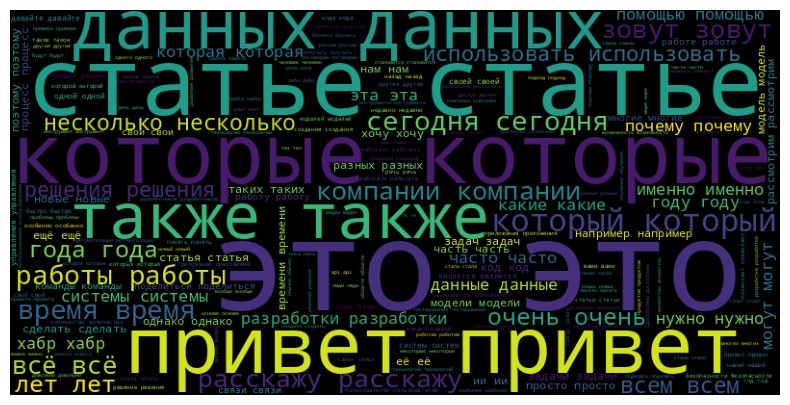

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Создание облака слов
word_string = ' '.join([word for word, count in word_counts.items() for _ in range(count)])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(word_string)

# Визуализация облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# ДЗ 2 Представление TF-IDF, word2vec/fasttext эмбеддинги

Примените tf-idf преобразование для текстового описания. Используйте слова как отдельные токены, так и биграммы. Не забудьте отсеять стоп-слова, слова которые встречаются слишком редко или слишком часто, уберите l2 регуляризацию.

Векторизуйте тексты с помощью метода word2vec/fasttext c весами tf-idf

Разбейте тексты на кластеры с использованием алгоритма k-means.
(Например, подберите оптимальное k, опираясь на "метод локтя")

Визуализируйте представление текстов (или подмножества текстов) в векторном пространстве.

In [20]:
num_documents = articles_df['Text'].dropna().shape[0]
print(f'Количество документов с текстом: {num_documents}')


Количество документов с текстом: 1000


In [21]:
from gensim.models import Word2Vec
# Обучение модели Word2Vec на токенах
w2v_model = Word2Vec(sentences=articles_df['Tokens'], vector_size=100, window=5, min_count=1, workers=4)

In [22]:
w2v_model.wv.most_similar("привет")

[('зовут', 0.546204686164856),
 ('связи', 0.4537597596645355),
 ('которыйочень', 0.42751774191856384),
 ('хабр', 0.4216762185096741),
 ('всем', 0.40515685081481934),
 ('pyloungeэта', 0.3673941195011139),
 ('visualization', 0.36379101872444153),
 ('электричество', 0.359134316444397),
 ('страницы', 0.35737818479537964),
 ('елисеев', 0.3459492027759552)]

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Векторизация текстов с использованием TF-IDF
articles_df['Cleaned_Text'] = articles_df['Tokens'].apply(lambda x: ' '.join(x))
vectorizer = TfidfVectorizer(max_df=1.0, min_df=1)
tfidf_matrix = vectorizer.fit_transform(articles_df['Cleaned_Text'])

# Получение векторов слов из модели Word2Vec и применение весов TF-IDF
def tfidf_w2v(text, index):
    words = text.split()
    tfidf_weights = tfidf_matrix[index].toarray()[0]  # Получаем веса TF-IDF для текущего текста
    word_vectors = [w2v_model.wv[word] * tfidf_weights[i] for i, word in enumerate(words) if word in w2v_model.wv]
    return np.sum(word_vectors, axis=0) if word_vectors else np.zeros(w2v_model.vector_size)

# Применяем функцию к каждому тексту и передаем индекс
article_vectors = np.array([tfidf_w2v(text, i) for i, text in enumerate(articles_df['Cleaned_Text'])])

In [24]:
# Проверка результата
print("Размерность матрицы article_vectors:", article_vectors.shape)
print("Последние 5 векторов:")
print(article_vectors[:5])

Размерность матрицы article_vectors: (1000, 100)
Последние 5 векторов:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 

In [25]:
import numpy as np
from sklearn.cluster import KMeans
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(article_vectors)
    inertia.append(kmeans.inertia_)

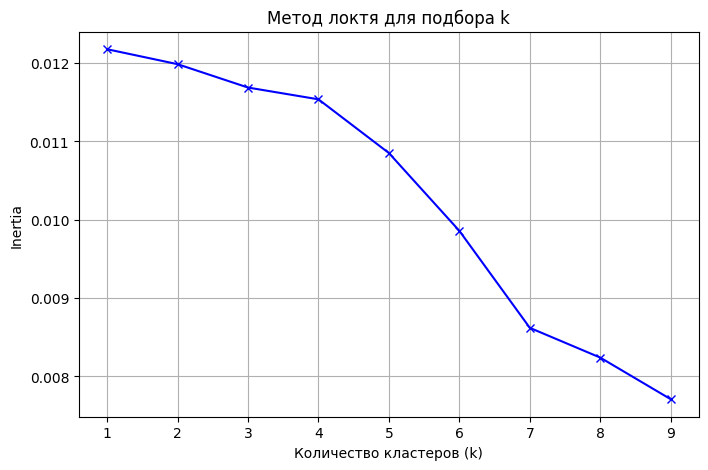

In [26]:
import matplotlib.pyplot as plt

# Визуализация метода локтя
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Inertia')
plt.title('Метод локтя для подбора k')
plt.xticks(K)
plt.grid()
plt.show()

In [27]:
# Выбор оптимального k
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(tfidf_matrix)

# Получение меток кластеров
articles_df['Cluster'] = kmeans.labels_
# Вывод результатов кластеризации

print("\nКластеры текстов:")
print(articles_df[['Text', 'Cluster']])


Кластеры текстов:
                                                  Text  Cluster
0    «Где мы, папа», — спросил меня 5-летний сын.«М...        0
1    Конец года — это всегда хорошее время для анал...        1
2    Сразу после выхода законов об изменении законо...        0
3    Дело в том что если на вашей модели отчётливо ...        3
4    Источник.Одноплатные компьютеры от Raspberry P...        1
..                                                 ...      ...
995  Все знают про распределение выборочного средне...        2
996  Это первая часть статьи, посвященной дженерика...        3
997  У меня дома есть малюсенькая домашняя «типогра...        1
998  Привет, земляне. Наконец то вBlenderпоявились ...        3
999  После переезда на openSUSE 15.5 я столкнулся с...        0

[1000 rows x 2 columns]


In [28]:
# Проверка уникальных кластеров
unique_clusters = articles_df['Cluster'].unique()
num_clusters = len(unique_clusters)

print(f"Количество различных кластеров: {num_clusters}")
print(f"Уникальные кластеры: {unique_clusters}")

Количество различных кластеров: 4
Уникальные кластеры: [0 1 3 2]


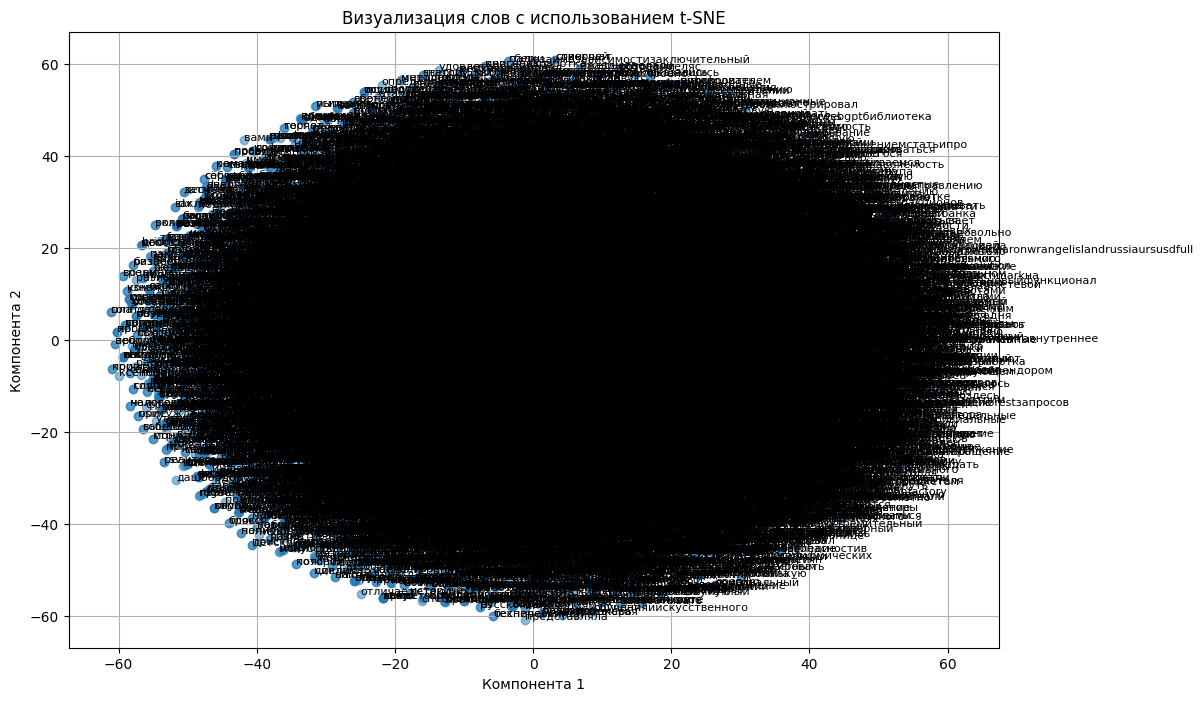

In [29]:
from sklearn.manifold import TSNE

sample_size = 300  # Количество слов для отображения
sample_indices = np.random.choice(len(w2v_model.wv.index_to_key), sample_size, replace=False)
# Получение векторов слов для визуализации
sample_indices = w2v_model.wv[w2v_model.wv.key_to_index]  # Получаем все векторы слов

# Снижение размерности с помощью t-SNE
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(sample_indices)

# Визуализация результатов
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], alpha=0.5)

# Добавление меток к точкам
for i, word in enumerate(w2v_model.wv.index_to_key):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=8)

plt.title('Визуализация слов с использованием t-SNE')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.grid()
plt.show()

# ДЗ 3. Классификация текстов. Генерация текстов.

Используйте в этом задании тексты, которые собрали в ДЗ_1

ЧАСТЬ А) Классификация текстов.

Разбейте свои тексты на обучающую и тестовую выборки.
Обучите бинарный или многоклассовый классификатор с использованием целевой переменной.
Оцените качество классификатора и выведите метрики и матрицу смежности.

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


In [31]:
articles_df

,Title,Text,Comment,Viev,Tokens,Cleaned_Text,Cluster
0,PyMyFlySpy: отслеживание полёта по бортовым да...,"«Где мы, папа», — спросил меня 5-летний сын.«М...",1,125,"[папа, спросил, летний, сынмы, приземлимся, пр...",папа спросил летний сынмы приземлимся примерно...,0
1,Как настроить систему продуктивности,Конец года — это всегда хорошее время для анал...,0,163,"[конец, года, это, хорошее, время, анализа, св...",конец года это хорошее время анализа своей про...,1
2,«Элемент впаривания». Интервью со специалистом...,Сразу после выхода законов об изменении законо...,0,119,"[сразу, выхода, законов, изменении, законов, о...",сразу выхода законов изменении законов ответст...,0
3,Сглаживание мешей в Blender,Дело в том что если на вашей модели отчётливо ...,1,150,"[дело, вашей, модели, отчётливо, видно, полиго...",дело вашей модели отчётливо видно полигональну...,3
4,Малинка в деле: пять креативных проектов на ба...,Источник.Одноплатные компьютеры от Raspberry P...,0,512,"[источникодноплатные, компьютеры, raspberry, p...",источникодноплатные компьютеры raspberry pi fo...,1
...,...,...,...,...,...,...,...
995,Что за распределение у выборочных квантилей?,Все знают про распределение выборочного средне...,1,852,"[знают, распределение, выборочного, среднего, ...",знают распределение выборочного среднего описы...,2
996,Дженерики в Go,"Это первая часть статьи, посвященной дженерика...",3,3.2K,"[это, первая, часть, статьи, посвященной, джен...",это первая часть статьи посвященной дженерикам...,3
997,Как я поддерживаю правильную влажность в домаш...,У меня дома есть малюсенькая домашняя «типогра...,12,3.5K,"[дома, малюсенькая, домашняя, типография, искл...",дома малюсенькая домашняя типография исключите...,1
998,Blender 4.3. Управляем нашими ассетами на базе...,"Привет, земляне. Наконец то вBlenderпоявились ...",1,593,"[привет, земляне, вblenderпоявились, средства,...",привет земляне вblenderпоявились средства благ...,3


In [32]:
unique_count = articles_df['Cluster'].value_counts()
unique_count

,count
Cluster,
3,310
0,248
1,231
2,211


In [33]:
# Разделение данных на обучающую и тестовую выборки
X = articles_df['Cleaned_Text']
y = articles_df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [34]:
# Векторизация текстов с использованием TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.8, min_df=1)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [35]:
# Обучение классификатора
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [36]:
# Оценка качества классификатора
y_pred = classifier.predict(X_test_vectorized)

In [37]:
# Вывод метрик и матрицы смежности
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.08      0.13        93
           1       1.00      0.07      0.12        92
           2       0.78      0.22      0.34        82
           3       0.37      0.99      0.54       133

    accuracy                           0.41       400
   macro avg       0.70      0.34      0.28       400
weighted avg       0.66      0.41      0.31       400

Confusion Matrix:
[[  7   0   2  84]
 [  2   6   2  82]
 [  2   0  18  62]
 [  0   0   1 132]]


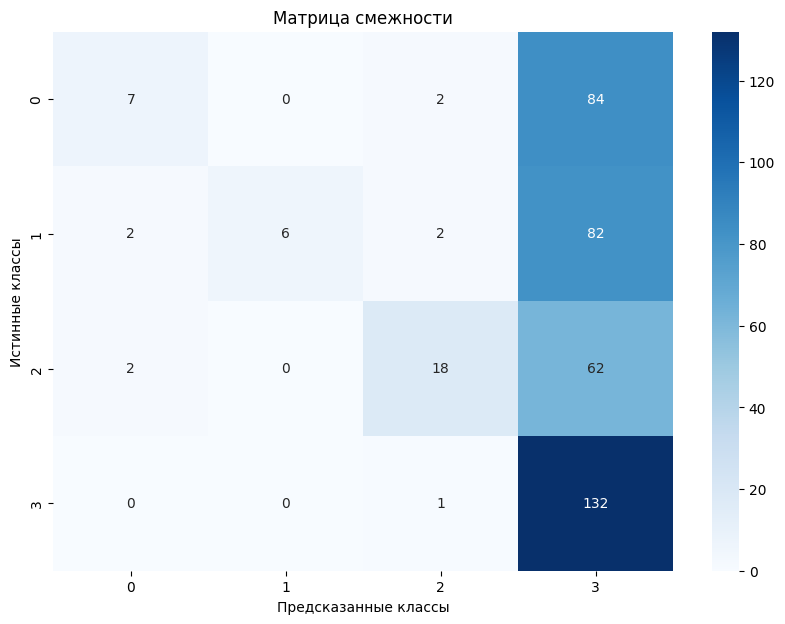

In [66]:
import seaborn as sns
# Построение матрицы смежности (confusion matrix)
conf_matrix = confusion_matrix(y_test, y_pred)

# Визуализация матрицы смежности
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Матрица смежности')
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.show()

Общая точность модели составляет только 42%, что говорит о том, что модель не очень хорошо справляется с задачей классификации.
Классы 2 и 3 имеют нулевые значения по всем метрикам (precision, recall и f1-score), что говорит о том, что модель не смогла правильно классифицировать ни один пример этих классов.
классы 1 и 4 имеют значительно больше примеров по сравнению с классами 2 и 3.

ЧАСТЬ Б)

Используя свой корпус текстов, создайте статистическую и нейросетевую (на SimpleRNN, на GRU, на LSTM) языковую модель и сгенерируйте несколько (10 и более) текстов обоими способами, сохраните и отложите их, они пригодятся в следующем задании



In [67]:
from nltk import ngrams
from collections import defaultdict

In [68]:
# Подготовка данных
text_corpus = ' '.join(articles_df['Cleaned_Text'])  # Объединение текстов в один

In [69]:
# Создание биграммной модели
def generate_bigrams(text):
    tokens = text.split()
    bigrams = list(ngrams(tokens, 2))
    model = defaultdict(list)

    for w1, w2 in bigrams:
        model[w1].append(w2)

    return model

bigram_model = generate_bigrams(text_corpus)

In [70]:
# Генерация текста с использованием биграммной модели
def generate_text_bigrams(model, start_word, num_words=50):
    current_word = start_word
    generated_text = [current_word]

    for _ in range(num_words - 1):
        next_words = model.get(current_word, None)
        if not next_words:
            break
        current_word = random.choice(next_words)
        generated_text.append(current_word)

    return ' '.join(generated_text)

In [71]:
# Генерация 10 текстов
generated_texts_bigrams = []
for _ in range(10):
    start_word = random.choice(list(bigram_model.keys()))
    generated_texts_bigrams.append(generate_text_bigrams(bigram_model, start_word))
generated_texts_bigrams

['потерь кроссэнтропии chronos предобучен вся еда утомлять необходимостью стандартом зарплату поднимут настроение постараюсь разъяснить некоторые особенностиcssаитак начнём классическое рассмотрение графики никого устроит приоткроем завесу тайны устроен наш кейс автоматизацию добрый сишный препроцессор cppда господа именно целью дальнейшего роста объема информации бизнесе бизнеспроцессами необходимо разрабатывать нефтяные скважины некоторое время времени выделять',
 'индустрию словно ураган заставив восхищаться открытым исходным кодом й неделю появляется новый визовый срок метод помощи метрик измерить ping представьте бизнесу клиентам банка отказавшись ручного подсчёта расстояний предыдущей статье начали предлагаем бесплатный год приводим мнение иным вопросам получить доступ центральным серверам discord аудиокодекам протоколу передачи данных факту являются критически важное',
 'стартом увлекательном пути любимой музыкой дома несколько обеспечить надежность устойчивость данных оптимизац

In [72]:
# Сохранение сгенерированных текстов
with open('generated_texts_bigrams.txt', 'w', encoding='utf-8') as f:
    for text in generated_texts_bigrams:
        f.write(text + '\n')

In [73]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [74]:
texts = articles_df['Cleaned_Text'].tolist()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [75]:
# Создание последовательностей для обучения
max_length = max(len(seq) for seq in sequences)  # Максимальная длина последовательности
X = []
y = []

for seq in sequences:
    for i in range(1, len(seq)):
        X.append(seq[:i])
        y.append(seq[i])

X = pad_sequences(X, maxlen=max_length-1)
y = np.array(y)

In [76]:
# Создание LSTM модели
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length-1))
model_lstm.add(LSTM(100))
model_lstm.add(Dense(len(tokenizer.word_index) + 1, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [77]:
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.0091 - loss: 9.7555
Epoch 2/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.0097 - loss: 9.1333
Epoch 3/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.0125 - loss: 8.5676
Epoch 4/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.0207 - loss: 7.7424
Epoch 5/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.0532 - loss: 6.8062
Epoch 6/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.1329 - loss: 5.9221
Epoch 7/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.2492 - loss: 5.1035
Epoch 8/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.3648 - loss: 4.3297
Epoch 9/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.4711 - loss: 3.6288
Epoch 10/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.5663 - loss: 2.9846


In [78]:
# Генерация текста с использованием LSTM модели
def generate_text_lstm(model, tokenizer, seed_text, num_words=50):
    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_length-1)
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted)
        output_word = ''

        for word, index in tokenizer.word_index.items():
            if index == predicted_word_index:
                output_word = word
                break

        seed_text += ' ' + output_word

    return seed_text

In [79]:
# Генерация 10 текстов с использованием LSTM
generated_texts_lstm = []
for _ in range(10):
    seed_text = random.choice(texts)  # Случайное начальное слово или фраза из корпуса
    generated_texts_lstm.append(generate_text_lstm(model_lstm, tokenizer, seed_text))
generated_texts_lstm

['многие пользователи часто интересуются сделать иичатботы писали сами сути хотят такие чатботы chatgpt claude gemini копировали стиль письма приходилось каждый писать ии подробные инструкциия говорю пользователям это сделать двумя способами это означать считаю человек иметь изучением элементы называемых просадка разные многие ездили перепечатать качества команды оптимизации разработки исследованиям проведенным raga общих общих общих генератораизвлекателя систем систем обходить обходить денег администратора почему жизни круто это означать которое предприятия надежности решил создать работы office никого уверен стал заявил пути время потребность собственного',
 'custdev аудитории бесплатно сравнение онлайн офлайн опросовcloffer молодой стартап занимаемся диджитализацией общественного питаниявнедряем it mlтехнологии бизнес поисках product market fit проверяли множество гипотез делали это эффективно именно поэтому хотим поделиться личным опытом сделать выводы стоит проводить опросы целево

In [80]:
# Сохранение сгенерированных текстов
with open('generated_texts_lstm.txt', 'w', encoding='utf-8') as f:
    for text in generated_texts_lstm:
        f.write(text + '\n')

In [81]:
model_gru = Sequential()
model_gru.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length-1))
model_gru.add(GRU(100))
model_gru.add(Dense(len(tokenizer.word_index) + 1, activation='softmax'))

model_gru.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.0076 - loss: 9.7679
Epoch 2/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.0106 - loss: 9.0570
Epoch 3/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.0199 - loss: 8.1869
Epoch 4/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.0467 - loss: 7.0682
Epoch 5/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.1361 - loss: 5.9458
Epoch 6/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.2954 - loss: 4.8915
Epoch 7/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.4624 - loss: 3.9255
Epoch 8/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.5967 - loss: 3.0593
Epoch 9/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7002 - loss: 2.2916
Epoch 10/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7785 - loss: 1.6851


In [82]:
# Генерация текста с использованием GRU модели
def generate_text_gru(model, tokenizer, seed_text, num_words=50):
    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_length-1)
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted)
        output_word = ''

        for word, index in tokenizer.word_index.items():
            if index == predicted_word_index:
                output_word = word
                break

        seed_text += ' ' + output_word

    return seed_text

In [83]:
# Генерация 10 текстов с использованием GRU
generated_texts_gru = []
for _ in range(10):
    seed_text = random.choice(texts)  # Случайное начальное слово или фраза из корпуса
    generated_texts_gru.append(generate_text_gru(model_gru, tokenizer, seed_text))

# Сохранение сгенерированных текстов GRU
with open('generated_texts_gru.txt', 'w', encoding='utf-8') as f:
    for text in generated_texts_gru:
        f.write(text + '\n')

In [84]:
# Создание и обучение SimpleRNN модели
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length-1))
model_rnn.add(SimpleRNN(100))
model_rnn.add(Dense(len(tokenizer.word_index) + 1, activation='softmax'))

model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 56s 31ms/step - accuracy: 0.0062 - loss: 10.0703
Epoch 2/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.0062 - loss: 9.7221
Epoch 3/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.0112 - loss: 9.4458
Epoch 4/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.0121 - loss: 9.0738
Epoch 5/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 52s 30ms/step - accuracy: 0.0120 - loss: 9.0879
Epoch 6/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.0143 - loss: 8.7762
Epoch 7/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.0173 - loss: 8.3621
Epoch 8/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.0251 - loss: 8.0480
Epoch 9/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.0391 - loss: 7.2447
Epoch 10/10
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.0656 - loss: 6.5203


In [88]:
# Генерация 10 текстов с использованием SimpleRNN
def generate_text_rnn(model, tokenizer, seed_text, num_words=50):
    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_length-1)
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted)
        output_word = ''

        for word, index in tokenizer.word_index.items():
            if index == predicted_word_index:
                output_word = word
                break

        seed_text += ' ' + output_word

    return seed_text

In [89]:
generated_texts_rnn = []
for _ in range(10):
    seed_text = random.choice(texts)  # Случайное начальное слово или фраза из корпуса
    generated_texts_rnn.append(generate_text_rnn(model_rnn, tokenizer, seed_text))

# Сохранение сгенерированных текстов SimpleRNN
with open('generated_texts_rnn.txt', 'w', encoding='utf-8') as f:
    for text in generated_texts_rnn:
        f.write(text + '\n')

Задание 4 Кластеризация текстов. Тематическое разбиение текстов. Выделение именованных сущностей


In [90]:
# Загрузка сгенерированных текстов
generated_texts_bigrams = pd.read_csv('generated_texts_bigrams.txt', header=None, names=['Text'])
generated_texts_lstm = pd.read_csv('generated_texts_lstm.txt', header=None, names=['Text'])
generated_texts_gru = pd.read_csv('generated_texts_gru.txt', header=None, names=['Text'])
generated_texts_rnn = pd.read_csv('generated_texts_rnn.txt', header=None, names=['Text'])
# Объединение всех текстов в один DataFrame
all_texts_df = pd.concat([articles_df[['Cleaned_Text']], generated_texts_bigrams, generated_texts_lstm, generated_texts_gru, generated_texts_rnn], ignore_index=True)

In [91]:
print(all_texts_df['Cleaned_Text'].isnull().sum())

40


In [92]:
all_texts_df = all_texts_df.dropna(subset=['Cleaned_Text'])

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
russian_stop_words = [
    'и', 'в', 'не', 'на', 'с', 'что', 'как', 'по',
    'это', 'к', 'за', 'то', 'для', 'а', 'все'
]
# Векторизация текстов
vectorizer = CountVectorizer(stop_words=russian_stop_words)
X = vectorizer.fit_transform(all_texts_df['Cleaned_Text'])

In [95]:
from sklearn.decomposition import LatentDirichletAllocation

# Обучение модели LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)

# Функция для отображения тем
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Тема {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda_model, vectorizer.get_feature_names_out(), 10)

Тема 0:
статье которые привет также данных который время работы использовать всем
Тема 1:
статье которые привет сегодня очень хабр расскажу всё зовут году
Тема 2:
статье привет который которые зовут расскажу компании работы почему данных
Тема 3:
статье которые также данных сегодня который очень привет года расскажу
Тема 4:
которые статье данных компании также разработки привет сегодня который именно


In [96]:
from sklearn.decomposition import TruncatedSVD

# Обучение модели LSA
lsa_model = TruncatedSVD(n_components=5)
lsa_model.fit(X)

display_topics(lsa_model, vectorizer.get_feature_names_out(), 10)

Тема 0:
которые статье данных привет также который время работы компании очень
Тема 1:
данных данные хранилищ данным моделей wear множеством разных временных помощью
Тема 2:
статье привет зовут расскажу хабр решения разработки рассмотрим тестирования сегодня
Тема 3:
которые ии году других новые системы сегодня года sega систем
Тема 4:
энергии тепла также статье спроса использование энергию мельница ветряная тепло


In [97]:
from sklearn.decomposition import NMF

# Обучение модели NMF
nmf_model = NMF(n_components=5)
nmf_model.fit(X)

display_topics(nmf_model, vectorizer.get_feature_names_out(), 10)

Тема 0:
которые привет сегодня зовут года компании всем разработки системы лет
Тема 1:
данных данные например wear хранилищ моделей данным разных модели часы
Тема 2:
который всё очень предложения например время часто наизусть чтото ещё
Тема 3:
ии других интеллект зависимости ресурсов означает осознание включать собственные моральной
Тема 4:
статье также решения расскажу который рассмотрим помощью разработки использовать привет


In [98]:
def get_topic_distribution(model, X):
    return model.transform(X)

# Получаем распределение тем для всех текстов
lda_topic_distribution = get_topic_distribution(lda_model, X)
lsa_topic_distribution = get_topic_distribution(lsa_model, X)
nmf_topic_distribution = get_topic_distribution(nmf_model, X)

# Добавляем распределение тем в DataFrame
all_texts_df['LDA_Topic'] = lda_topic_distribution.argmax(axis=1)
all_texts_df['LSA_Topic'] = lsa_topic_distribution.argmax(axis=1)
all_texts_df['NMF_Topic'] = nmf_topic_distribution.argmax(axis=1)

print(all_texts_df.tail(len(generated_texts_bigrams) + len(generated_texts_lstm) + len(generated_texts_gru) + len(generated_texts_rnn)))


                                          Cleaned_Text Text  LDA_Topic  \
960  привет хабр зовут игорь слепко днем обычный mi...  NaN          2   
961  знаток кофе адам бекет расследует историю зага...  NaN          3   
962  привет зовут денис pythonразработчик kokoc gro...  NaN          3   
963  всем приветя занимаюсь разработкой nuxt самого...  NaN          1   
964  магистратуре итмо стараемся погружать студенто...  NaN          2   
965  интерфейс транспортного средства напрямую влия...  NaN          1   
966  время языковые модели справляются такими задач...  NaN          0   
967  привет сергей чипсанов руковожу маркетингом сд...  NaN          2   
968  обработка заказов это самых сложных аспектов e...  NaN          0   
969  научные прикладные исследования сфере нано мат...  NaN          3   
970  время вычислительные ресурсы требовали дорогос...  NaN          4   
971  руанда приходит ум слышите название маленькой ...  NaN          1   
972  всем привет связи виктор стародуб

ЧАСТЬ Б


In [99]:
pip install natasha

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 90.9 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=6b6a9ff2731796448318ba2b30e9b6d8bac013732e655fca154744f1cdf73745
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26097 sha256=11336aef0f020449228ab16e646b9d7f3175bba9e1ed8da98947ef4f6ed4625c
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built docopt intervaltree


In [100]:
from natasha import (
    Segmenter,
    MorphVocab,
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    Doc
)

In [101]:
# Инициализация инструментов
segmenter = Segmenter()
morph_vocab = MorphVocab()
embedding = NewsEmbedding()
morph_tagger = NewsMorphTagger(embedding)
syntax_parser = NewsSyntaxParser(embedding)
ner_tagger = NewsNERTagger(embedding)

In [102]:
# Функция для извлечения именованных сущностей
def extract_entities(text):
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    doc.parse_syntax(syntax_parser)
    doc.tag_ner(ner_tagger)

    entities = {
        "PERSON": [],
        "ORG": [],
        "GPE": []
    }

    for span in doc.spans:
        if span.type == 'PER':
            entities["PERSON"].append(span.text)
        elif span.type == 'ORG':
            entities["ORG"].append(span.text)
        elif span.type == 'GPE':
            entities["GPE"].append(span.text)

    return entities

# Применение функции ко всем текстам в DataFrame
all_texts_df['Entities'] = all_texts_df['Cleaned_Text'].apply(extract_entities)

# Проверка результатов
print(all_texts_df[['Cleaned_Text', 'Entities']].head())

                                        Cleaned_Text  \
0  папа спросил летний сынмы приземлимся примерно...   
1  конец года это хорошее время анализа своей про...   
2  сразу выхода законов изменении законов ответст...   
3  дело вашей модели отчётливо видно полигональну...   
4  источникодноплатные компьютеры raspberry pi fo...   

                               Entities  
0  {'PERSON': [], 'ORG': [], 'GPE': []}  
1  {'PERSON': [], 'ORG': [], 'GPE': []}  
2  {'PERSON': [], 'ORG': [], 'GPE': []}  
3  {'PERSON': [], 'ORG': [], 'GPE': []}  
4  {'PERSON': [], 'ORG': [], 'GPE': []}  


In [103]:
# Подсчет упоминаемых сущностей по темам
topic_entities = {}

for index, row in all_texts_df.iterrows():
    topic = row['NMF_Topic']
    entities = row['Entities']

    if topic not in topic_entities:
        topic_entities[topic] = {
            "PERSON": [],
            "ORG": [],
            "GPE": []
        }

    topic_entities[topic]["PERSON"].extend(entities["PERSON"])
    topic_entities[topic]["ORG"].extend(entities["ORG"])
    topic_entities[topic]["GPE"].extend(entities["GPE"])

# Вывод результатов по темам
for topic, entities in topic_entities.items():
    print(f"Тема {topic}:")
    print("Имена персон:", set(entities["PERSON"]))
    print("Организации:", set(entities["ORG"]))
    print("Географические названия:", set(entities["GPE"]))
    print()

Тема 2:
Имена персон: set()
Организации: {'sony'}
Географические названия: set()

Тема 0:
Имена персон: set()
Организации: {'yahoo', 'microsoft'}
Географические названия: set()

Тема 4:
Имена персон: set()
Организации: set()
Географические названия: set()

Тема 1:
Имена персон: set()
Организации: {'reuters bloomberg'}
Географические названия: set()

Тема 3:
Имена персон: set()
Организации: set()
Географические названия: set()

